In [1]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import random
import pickle
import matplotlib.pyplot as plt

from utils import get_features, save_scores
from object_selection import ObjectSelection
from load_data import load_data

# Parameters
data_directory = '../../data/generated-data-r-2-n-8-2/'
features_path = '../../data/features-generated-data-r-2-n-8-2'
booking_file = '../../data/booking.csv'
users_file = '../../data/user.csv'
rating_thresholds = [1, 7]
true_objects_indexes = [0, 1, 2, 3, 4, 5, 6, 7]
false_objects_indexes = [8, 9]

file_names = os.listdir(data_directory)
img_ids_vector = [int(name.split('-')[0]) for name in file_names]
ratings_vector = [int(name.split('-')[-2]) for name in file_names]
name_vector = [data_directory + name for name in file_names]
images_indexes = [name.split('-')[3].split('.')[0] for name in file_names]
rating_thresholds = [1, 7]

ratings_matrix, images_indexes_for_id, ids_indexes, users_matrix = load_data(data_directory, booking_file, users_file, rating_thresholds)

features = get_features(features_path, name_vector)

/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Object selection: random

Dfmf

Parameters

12 10 8 8


rmse: 1.2828120813335586


-----



auc: 0.6460995934113206
Object selection: random

Dfmf

Parameters

12 10 8 8


rmse: 1.3110942850003422


-----



auc: 0.6643279798544108
Object selection: random

Dfmf

Parameters

12 10 8 8


rmse: 1.3000729633752237


-----



auc: 0.6548472300559904
Object selection: random

Dfmf

Parameters

12 10 8 8


rmse: 1.3025539352158184


-----



auc: 0.6378471247309241
Object selection: random

Dfmf

Parameters

12 10 8 8


rmse: 1.3050670650232328


-----



auc: 0.6801790825046679
Object selection: random

Dfmf

Parameters

12 10 8 8


rmse: 1.2978673009774928


-----



auc: 0.6531913101909854
Object selection: random

Dfmf

Parameters

12 10 8 8


rmse: 1.287022019506486


-----



auc: 0.6486809477889517
Object selection: random

Dfmf

Parameters

12 10 8 8


rmse: 1.2944608032838185


-----



auc: 0.6515513410704746
Object selection: random

Dfmf

Parameters

12 10 8 8


rmse: 1.309483018

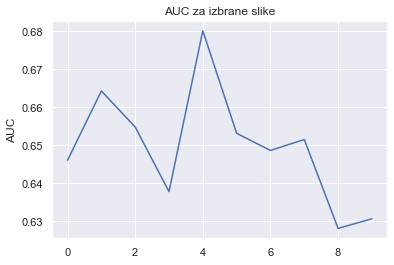

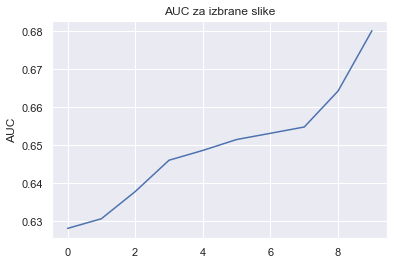

In [2]:
# Random selection
cv_results_file = '../results/cv-generated-data-r-2-n-8-2-random.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='random')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector) 
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-r-2-n-8-2-random.csv'
save_scores(scores, results_file)


Preselection

(3000, 2048)
-
2273
0.7576666666666667
-
-
2198
0.9670033658297985
-
-
2190
0.9963613614732977
-
-
2189
0.9995433789954338
-
-
2189
1.0
-
Object selection: knn

Dfmf

Parameters

10 10 2 4


auc: 0.6850291015258732

rmse: 1.071959597685167


-----



auc: 0.6850291015258732

Preselection

(3000, 2048)
-
2273
0.7576666666666667
-
-
2198
0.9670033658297985
-
-
2190
0.9963613614732977
-
-
2189
0.9995433789954338
-
-
2189
1.0
-
Object selection: knn

Dfmf

Parameters

10 10 2 4


auc: 0.6917512832739614

rmse: 1.0928267473708442


-----



auc: 0.6917512832739614

Preselection

(3000, 2048)
-
2273
0.7576666666666667
-
-
2198
0.9670033658297985
-
-
2190
0.9963613614732977
-
-
2189
0.9995433789954338
-
-
2189
1.0
-
Object selection: knn

Dfmf

Parameters

10 10 2 4


auc: 0.7015369402410137

rmse: 1.0770092075441016


-----



auc: 0.7015369402410137

Preselection

(3000, 2048)
-
2273
0.7576666666666667
-
-
2198
0.9670033658297985
-
-
2190
0.9963613614732977
-
-
2189
0.9995433

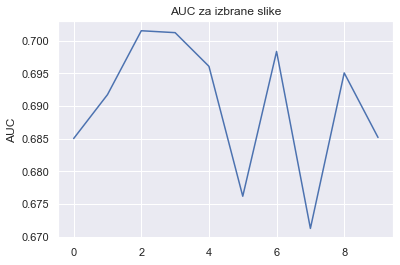

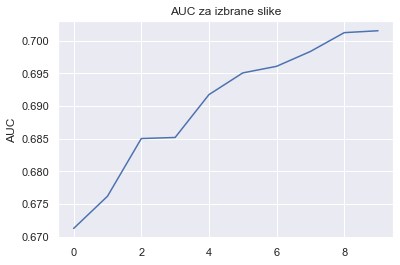

In [3]:
# K Nearest Neighbors
cv_results_file = '../results/cv-generated-data-r-2-n-8-2-knn.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='knn')
    #selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix, users=users_matrix, cv_results_file=cv_results_file)
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector)
    selection.evaluate(evaluation_metric='auc')
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-r-2-n-8-2-knn.csv'
save_scores(scores, results_file)


Preselection

(3000, 2048)
-
2261
0.7536666666666667
-
-
2235
0.9885004632222657
-
-
2235
1.0
-
-
2235
1.0
-
Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 1.201725898556401


-----



auc: 0.6724052245725683

Preselection

(3000, 2048)
-
2281
0.7603333333333334
-
-
2248
0.985529773843281
-
-
2247
0.9995555555555556
-
-
2247
1.0
-
Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 1.201928191329375


-----



auc: 0.66119234282824

Preselection

(3000, 2048)
-
2278
0.7593333333333333
-
-
2241
0.9837557497168481
-
-
2240
0.999553770638108
-
-
2240
1.0
-
Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 1.2512380102113236


-----



auc: 0.6616430840507461

Preselection

(3000, 2048)
-
2261
0.7536666666666667
-
-
2223
0.9831942492335403
-
-
2223
1.0
-
-
2223
1.0
-
Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 1.1909719700428019


-----



auc: 0.6582924601698069

Preselection

(3000, 2048)
-
2267
0.7556666666666668
-
-
2230
0.9836767230806966
-
-
22

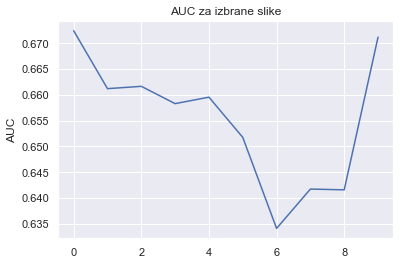

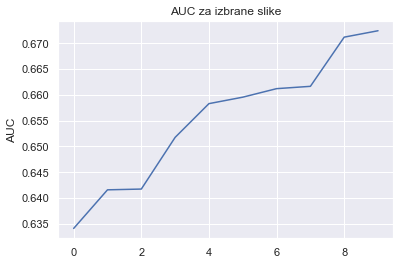

In [4]:
# Random forest
cv_results_file = '../results/cv-generated-data-r-2-n-8-2-random.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='rf')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector) 
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-r-2-n-8-2-rf.csv'
save_scores(scores, results_file)

In [5]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import random
import pickle
import matplotlib.pyplot as plt

from utils import get_features, save_scores
from object_selection import ObjectSelection
from load_data import load_data

# Parameters
data_directory = '../../data/generated-data-r-2-n-8-2/'
features_path = '../../data/features-generated-data-r-2-n-8-2'
booking_file = '../../data/booking.csv'
users_file = '../../data/user.csv'
rating_thresholds = [1, 7]
true_objects_indexes = [0, 1, 2, 3, 4, 5, 6, 7]
false_objects_indexes = [8, 9]

file_names = os.listdir(data_directory)
img_ids_vector = [int(name.split('-')[0]) for name in file_names]
ratings_vector = [int(name.split('-')[-2]) for name in file_names]
name_vector = [data_directory + name for name in file_names]
images_indexes = [name.split('-')[3].split('.')[0] for name in file_names]
rating_thresholds = [1, 7]

ratings_matrix, images_indexes_for_id, ids_indexes, users_matrix = load_data(data_directory, booking_file, users_file, rating_thresholds)

features = get_features(features_path, name_vector)

from basic_factorization import BasicFactorization


cv_results_file = '../results/cv-generated-data-r-2-n-8-2-knn.csv'
scores = []
for _ in range(10):
    selection = BasicFactorization(show_selection_results=False, selection_algorithm='random')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                        users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                        true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                        paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
results_file = '../scores/generated-data-r-2-n-8-2-b.csv'
save_scores(scores, results_file)

Object selection: random

Dfmf

auc: 0.7219368758047117
Object selection: random

Dfmf

auc: 0.7161188797125544
Object selection: random

Dfmf

auc: 0.6926942005509529
Object selection: random

Dfmf

auc: 0.7091713408119658
Object selection: random

Dfmf

auc: 0.7075540563916277
Object selection: random

Dfmf

auc: 0.7151875563958234
Object selection: random

Dfmf

auc: 0.719359865656789
Object selection: random

Dfmf

auc: 0.6863151734357269
Object selection: random

Dfmf

auc: 0.7396424931453259
Object selection: random

Dfmf

auc: 0.7080395899660152
